<a href="https://colab.research.google.com/github/RajeshworM/AB_Tesing_Analysis/blob/main/AB_website_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


**Let’s walk through how to analyze this dataset using Python for an A/B testing analysis**

In [7]:
# Load and Explore the Data
import pandas as pd

# Load a dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/ab_website_data.csv')

# Display the first few rows of the dataframe
df.head()

# Basic information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


**Data Preprocessing**

In [8]:

# Drop any rows with missing 'converted' or 'group' values
df = df.dropna(subset=['converted', 'group'])

# Remove duplicates, if any
df = df.drop_duplicates()

# Check the data after cleaning
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


In [28]:
print(df.head())

  group  converted
0     A          1
1     A          0
2     A          1
3     B          0
4     B          0


**Basic Analysis**

In [29]:
# Group by 'group' (A or B) and calculate conversion rate for each group
conversion_rate = df.groupby('group')['converted'].mean()
print("Conversion Rates:")
print(conversion_rate)

# Also calculate the total number of users and conversions for each group
grouped_data = df.groupby('group')['converted'].agg(['count', 'sum'])
grouped_data['conversion_rate'] = grouped_data['sum'] / grouped_data['count']
print("\nGrouped Data (counts and conversion rates):")
print(grouped_data)


Conversion Rates:
group
A    0.666667
B    0.333333
Name: converted, dtype: float64

Grouped Data (counts and conversion rates):
       count  sum  conversion_rate
group                             
A          3    2         0.666667
B          3    1         0.333333


**Statistical Testing (t-test)**

In [30]:
from scipy import stats

# Extract conversion data for both groups
group_a = df[df['group'] == 'A']['converted']
group_b = df[df['group'] == 'B']['converted']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(group_a, group_b)

# Output the t-statistic and p-value
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("The difference between Variant A and Variant B is statistically significant.")
else:
    print("There is no statistically significant difference between Variant A and Variant B.")


T-statistic: 0.7071067811865475
P-value: 0.5185185185185183
There is no statistically significant difference between Variant A and Variant B.


**Visualizing the Data**

<ipython-input-31-6ddbe79dc18b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette='coolwarm')


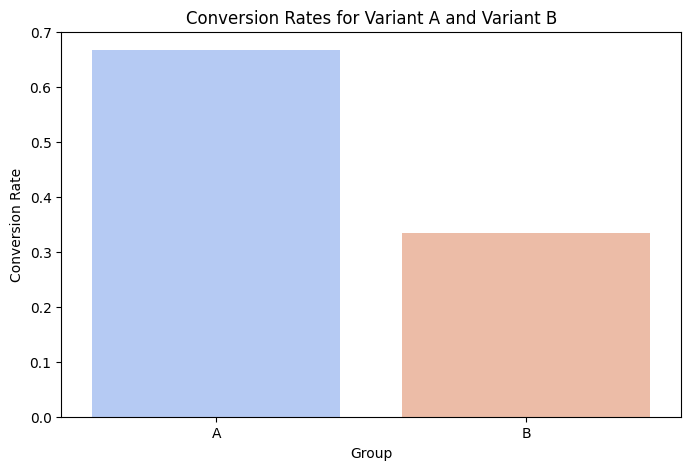

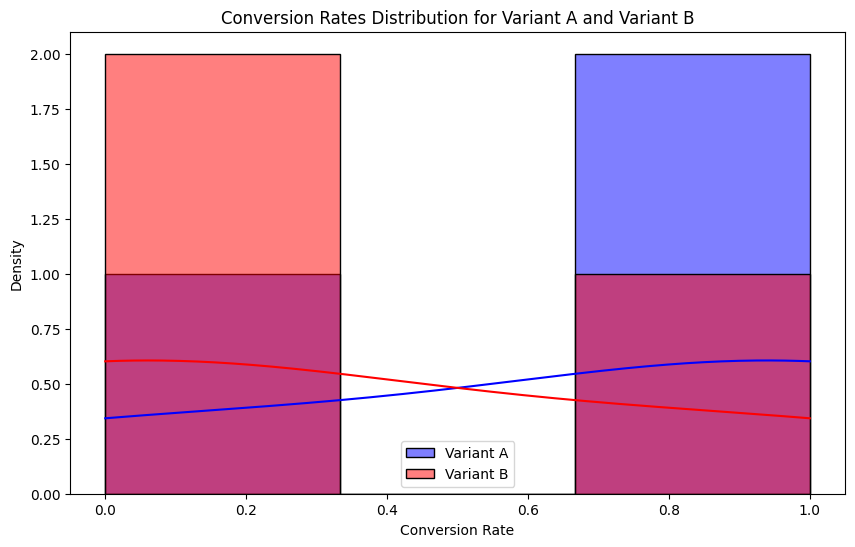

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting conversion rates for A and B
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette='coolwarm')
plt.title('Conversion Rates for Variant A and Variant B')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()

# Plotting histograms of conversions for both groups
plt.figure(figsize=(10, 6))
sns.histplot(group_a, color='blue', label='Variant A', kde=True, stat='density')
sns.histplot(group_b, color='red', label='Variant B', kde=True, stat='density')
plt.legend()
plt.title('Conversion Rates Distribution for Variant A and Variant B')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.show()


**Additional Insights (Optional)**

In [33]:
# Load and Explore the Data
import pandas as pd

# Load a dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/ab_website_data.csv')

# Display the first few rows of the dataframe
df.head()

# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/ab_website_data.csv')

# Display the first few rows of the dataframe
print(df.head())

# Basic information about the dataset
print(df.info())

# Ensure that the 'timestamp' column is in datetime format
# First, check for non-datetime values in the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  # Coerce invalid parsing to NaT (Not a Time)

# Check if there are any NaT values after conversion (which could indicate invalid timestamp formats)
print("Number of invalid timestamps (NaT):", df['timestamp'].isna().sum())

# Optionally, drop rows with invalid timestamps if necessary
df.dropna(subset=['timestamp'], inplace=True)

# Extract time-related features (hour of the day, day of the week)
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Encode categorical features such as 'group' and 'landing_page'
label_encoder = LabelEncoder()
df['group'] = label_encoder.fit_transform(df['group'])  # A: 0, B: 1
df['landing_page'] = label_encoder.fit_transform(df['landing_page'])  # Encode landing pages

# Select features (X) and target variable (y)
X = df[['group', 'landing_page', 'hour', 'day_of_week']]  # Features
y = df['converted']  # Target variable

# Check for missing values in the dataset
print(df.isnull().sum())

# Optional: Handle missing values (if any)
# If any other columns have missing data, you can handle them here as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


   user_id timestamp      group landing_page  converted
0   851104   11:48.6    control     old_page          0
1   804228   01:45.2    control     old_page          0
2   661590   55:06.2  treatment     new_page          0
3   853541   28:03.1  treatment     new_page          0
4   864975   52:26.2    control     old_page          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


<ipython-input-36-41cd31a6e587>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  # Coerce invalid parsing to NaT (Not a Time)


Number of invalid timestamps (NaT): 177212
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
hour            0
day_of_week     0
dtype: int64
Training set size: 93812, Test set size: 23454


Accuracy: 0.8810

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     20664
           1       0.00      0.00      0.00      2790

    accuracy                           0.88     23454
   macro avg       0.44      0.50      0.47     23454
weighted avg       0.78      0.88      0.83     23454



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


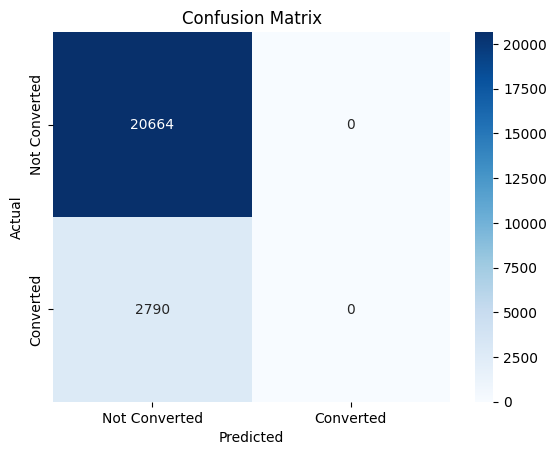

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


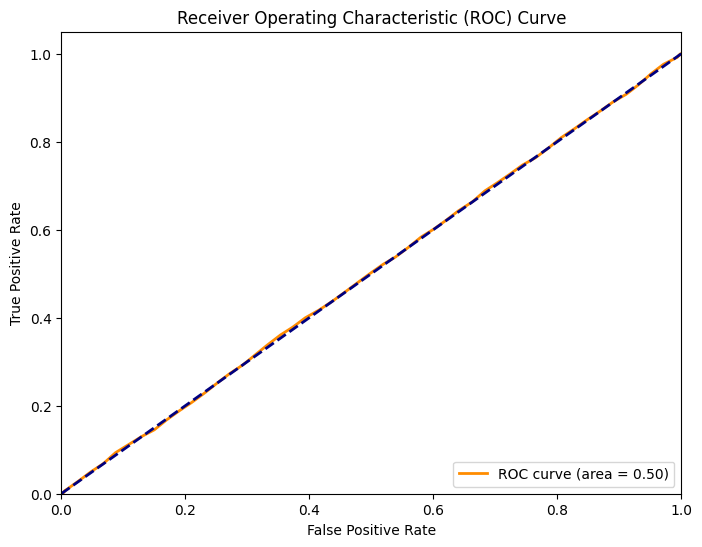

In [38]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Feature Coefficients:
      group  landing_page      hour  day_of_week
0  0.128552       0.17189 -0.001234    -0.849315


<ipython-input-39-f7529282d6b0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.columns, y=coefficients.values.flatten(), palette='coolwarm')


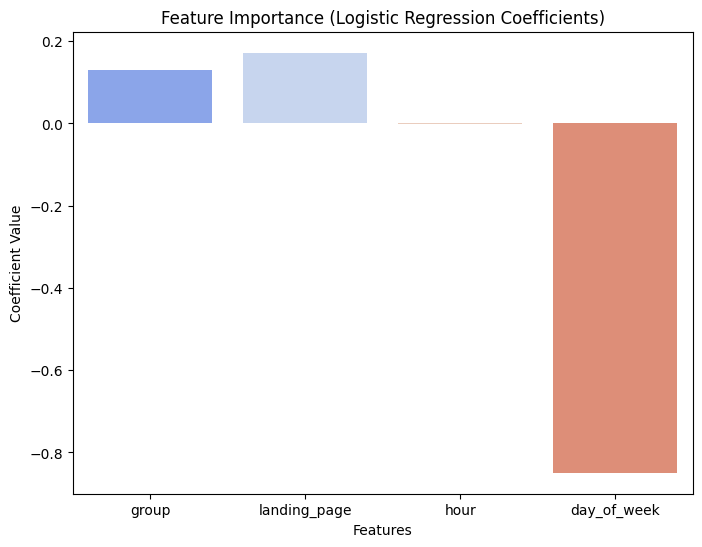

In [39]:
# Coefficients for Logistic Regression (interpret the impact of each feature)
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
print("\nFeature Coefficients:")
print(coefficients)

# Visualizing feature importance using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.columns, y=coefficients.values.flatten(), palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()
